In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../train.csv')
df_raw = df.copy()
## value가 문자 값이지만 등급을 나타내는 feature들 (nan값은 대상이 없음을 의미한다.)
tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
           }
df_raw = df_raw.replace(tonum)
## 그 외 nan값이 모르는 값이 아닌 대상이 없음을 의미 하는 feature들
fill_na_ls = [['GarageType',# NA : 차고 없음 (category)
 'MiscFeature',             # NA : 없음  (category) 기타 범주(엘레베이터, 테이스 코트) 기타 범주
 'Fence',                   # NA : 울타리 없음 (category)
 'GarageFinish',            # NA : 차고 없음 (category)
 'BsmtExposure',            # NA : 지하실 없음
 'Alley',                   # NA : No alley access
]]


for name in fill_na_ls:
    df_raw[name] = df_raw[name].fillna('N')
# 그래도 남은 Null값들
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option("display.max_rows",None)
missing_data.head()
# Null 값 drop
pd.set_option("display.max_columns",None)
df_raw = df_raw.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_raw = df_raw.drop(df_raw.loc[df_raw['Electrical'].isnull()].index)

# 1층과 2층 넓이 합침
df_raw['TotFlrSF'] = df_raw['1stFlrSF'] + df_raw['2ndFlrSF']

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


model_first :  TotFlrSF + KitchenQual + GarageCars + C(Neighborhood)+ OverallQual + GrLivArea + TotalBsmtSF

In [2]:
model_first = sm.OLS.from_formula("SalePrice ~  scale(TotFlrSF) + scale(KitchenQual) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", data=df_raw)
result_first = model_first.fit()
print(result_first.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     212.0
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:32:59   Log-Likelihood:                -17294.
No. Observations:                1459   AIC:                         3.465e+04
Df Residuals:                    1428   BIC:                         3.481e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [3]:
# 아웃라이어 제거
# influence = result_first.get_influence()
# cooks_d2, pvals = influence.cooks_distance
# fox_cr = 4 / (1460 - 1 - 13)
# idx = np.where(cooks_d2 > fox_cr)[0]
# df_fin1 = df_raw.copy()
# df_fin1 = df_fin1.drop(df_fin1.index[idx])


# model_firstfin = sm.OLS.from_formula("SalePrice ~  scale(TotFlrSF) + scale(KitchenQual) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", data=df_fin1)
# result_firstfin = model_firstfin.fit()
# print(result_firstfin.summary())

###  잔차 정규성 분석

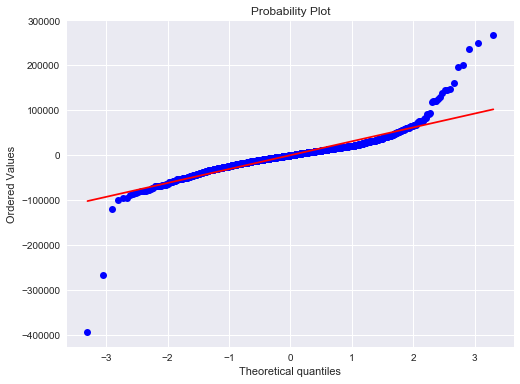

Chi^2       : 394.577
P-value     :  0.000


In [4]:
import scipy as sp
import statsmodels.stats.api as sms
#잔차정규성 그래프
plt.figure(figsize=(8, 6))
sp.stats.probplot(result_first.resid, plot=plt)
plt.show()
#잔차 정규성 P-value
test = sms.omni_normtest(result_first.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

#### 다중공선성 분석

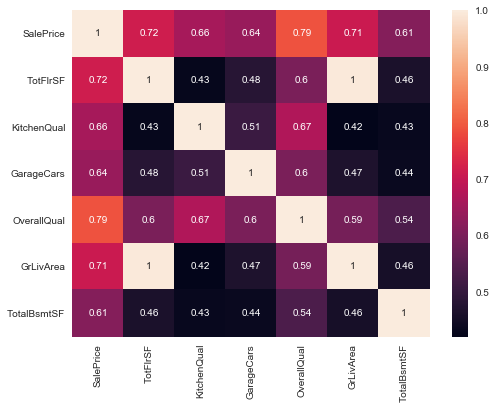

In [5]:
df_x = df_raw.loc[:, ['TotFlrSF', 'KitchenQual', 'GarageCars', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']]

model_first_df= df_x
df_y = df.loc[:, ['SalePrice']]

dfX_first = df_x

df_first = pd.concat([df_y.SalePrice, dfX_first], axis=1)
corrmat = df_first.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ls = ['TotFlrSF', 'KitchenQual', 'GarageCars', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']
dfX0= df_raw[ls]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,1141.306649,TotFlrSF
1,36.569756,KitchenQual
2,10.991170,GarageCars
3,52.554970,OverallQual
4,1108.294885,GrLivArea
5,10.269585,TotalBsmtSF


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ls = ['KitchenQual', 'GarageCars', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']
dfX0= df_raw[ls]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,36.569250,KitchenQual
1,10.809100,GarageCars
2,52.511069,OverallQual
3,15.207330,GrLivArea
4,10.250495,TotalBsmtSF


#### TotFlrSF를 제거해도 비슷한 수준의 성능이 나온다는 것

In [8]:
model_first = sm.OLS.from_formula("SalePrice ~  scale(KitchenQual) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", data=df_raw)
result_first = model_first.fit()
print(result_first.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:33:00   Log-Likelihood:                -17295.
No. Observations:                1459   AIC:                         3.465e+04
Df Residuals:                    1429   BIC:                         3.481e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Partial Regression Plot 작성(다항성) /하나의 독립변수의 영향력을 시각화하는 방법

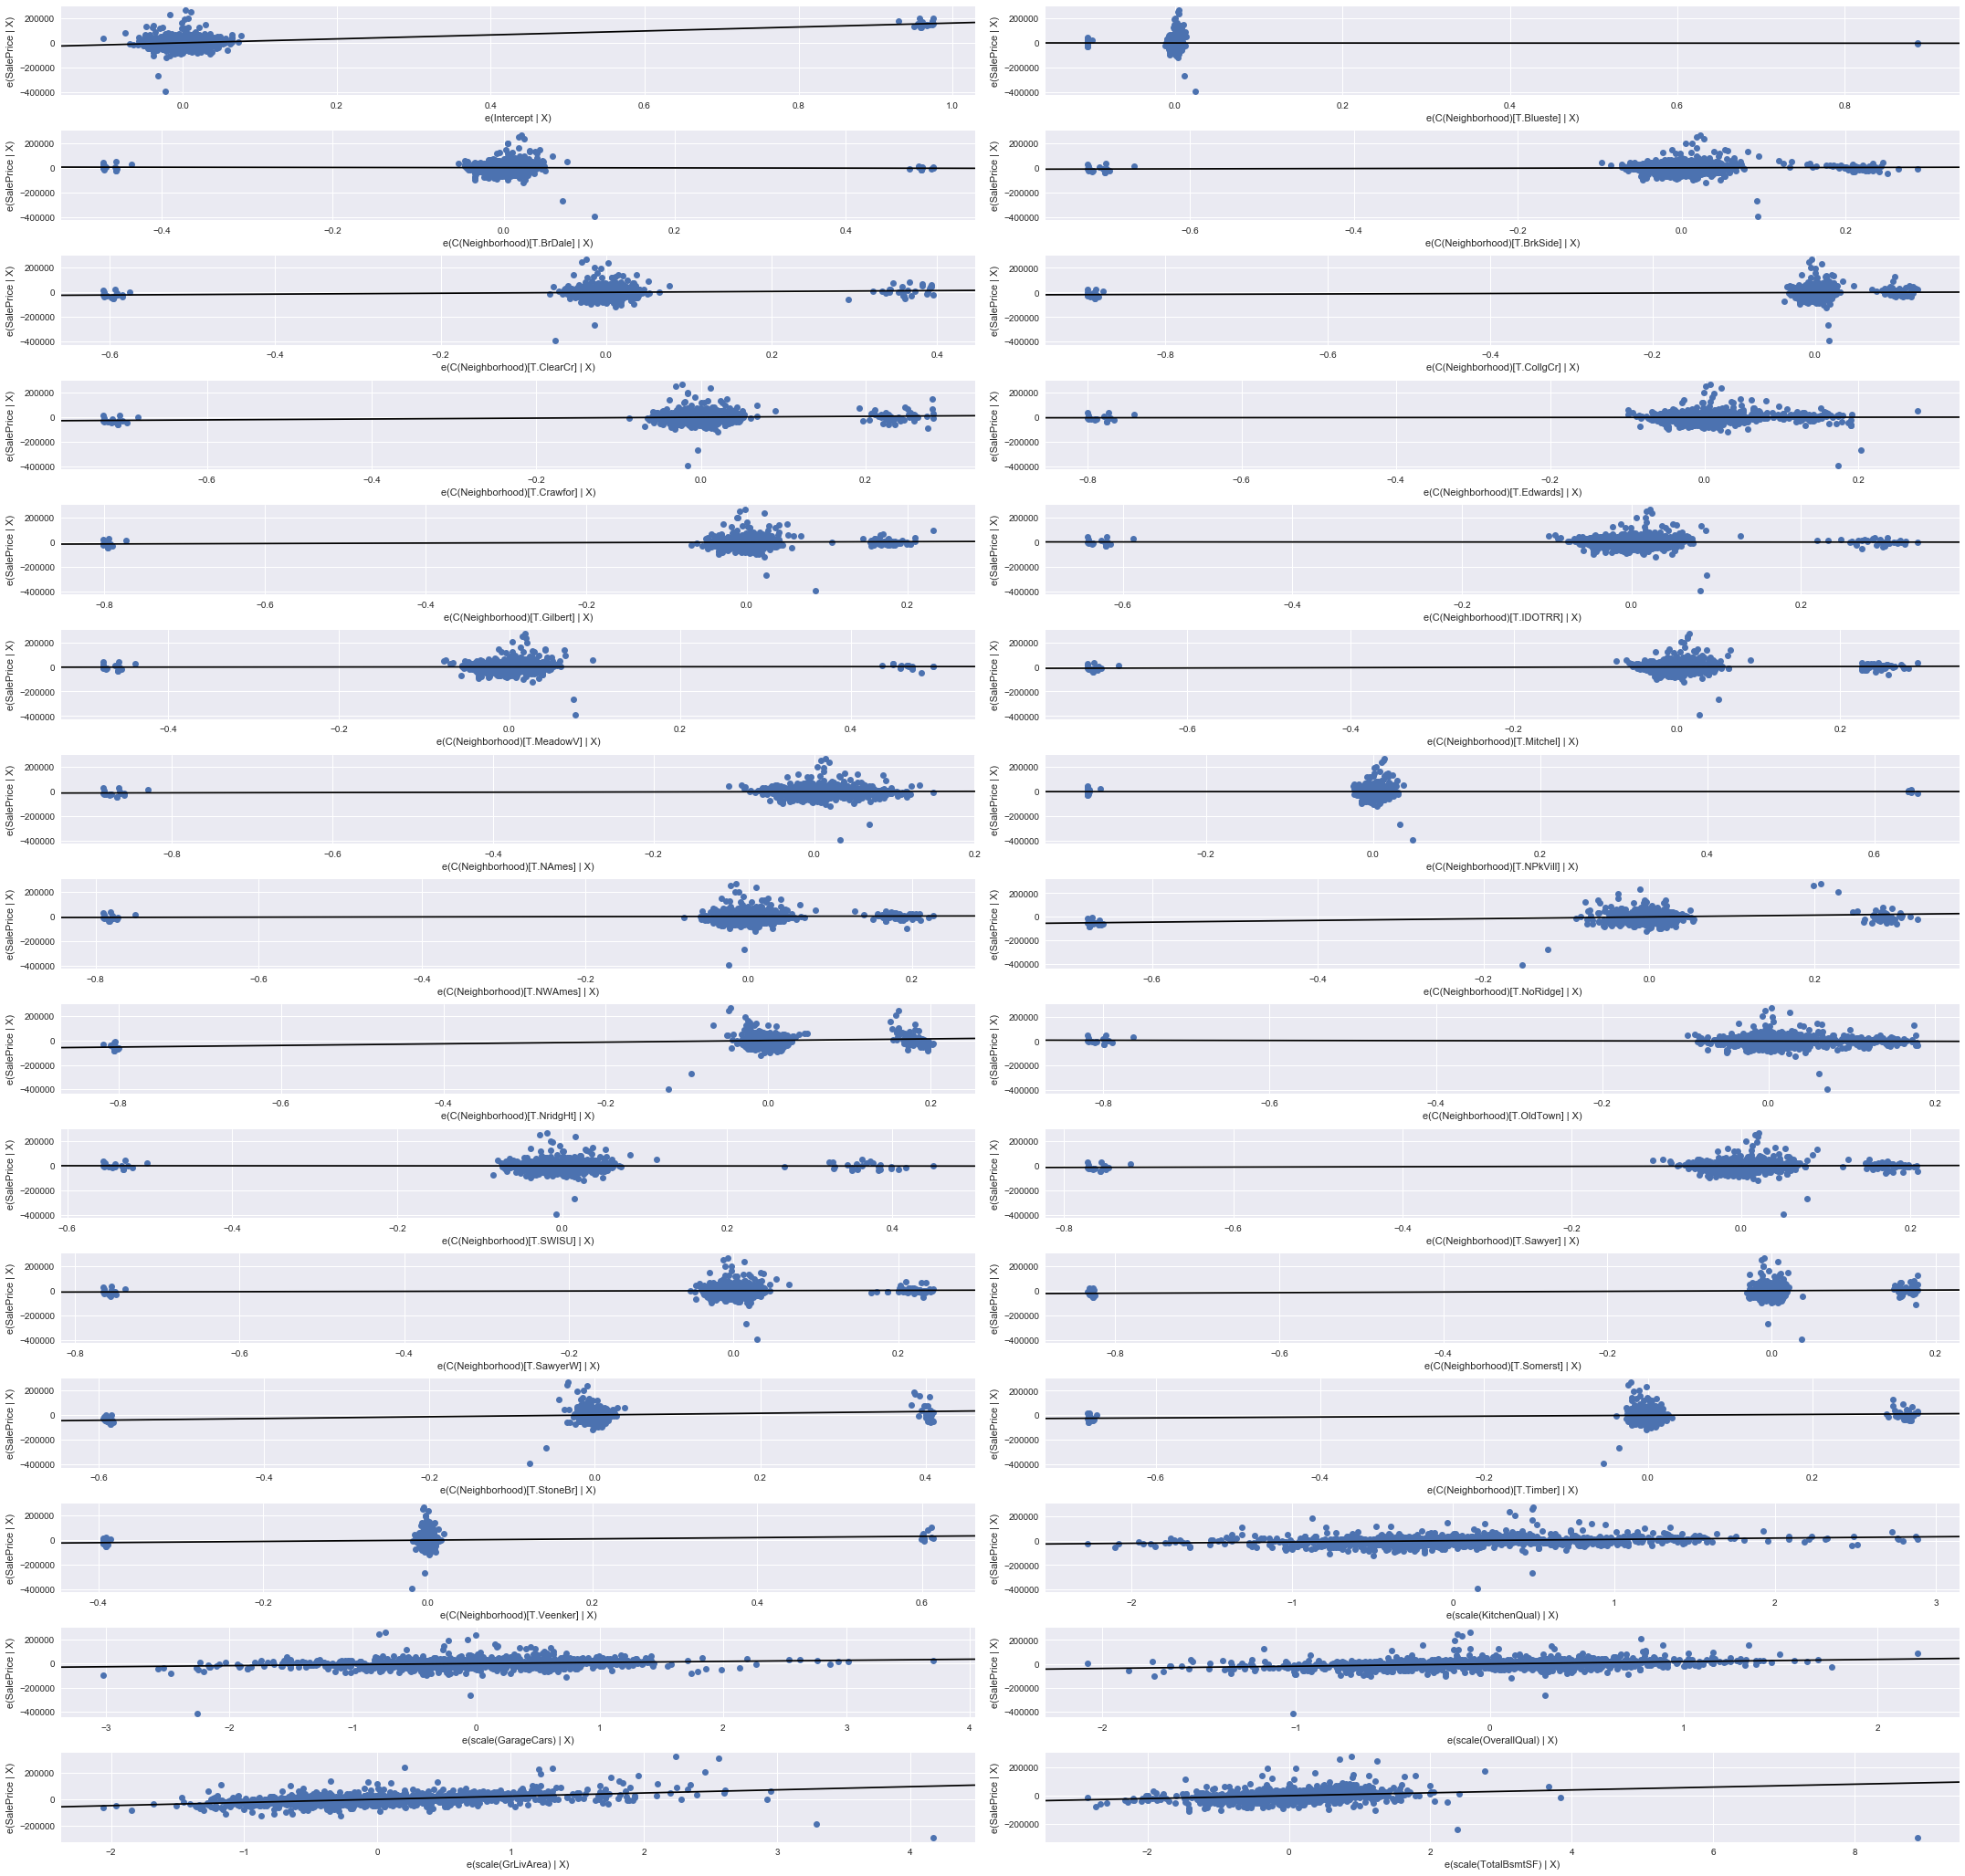

In [9]:
fig_partial = plt.figure(figsize=(30,30))
sm.graphics.plot_partregress_grid(result_first, fig=fig_partial)
fig_partial.suptitle("")
plt.show()

#### CCPR 작성

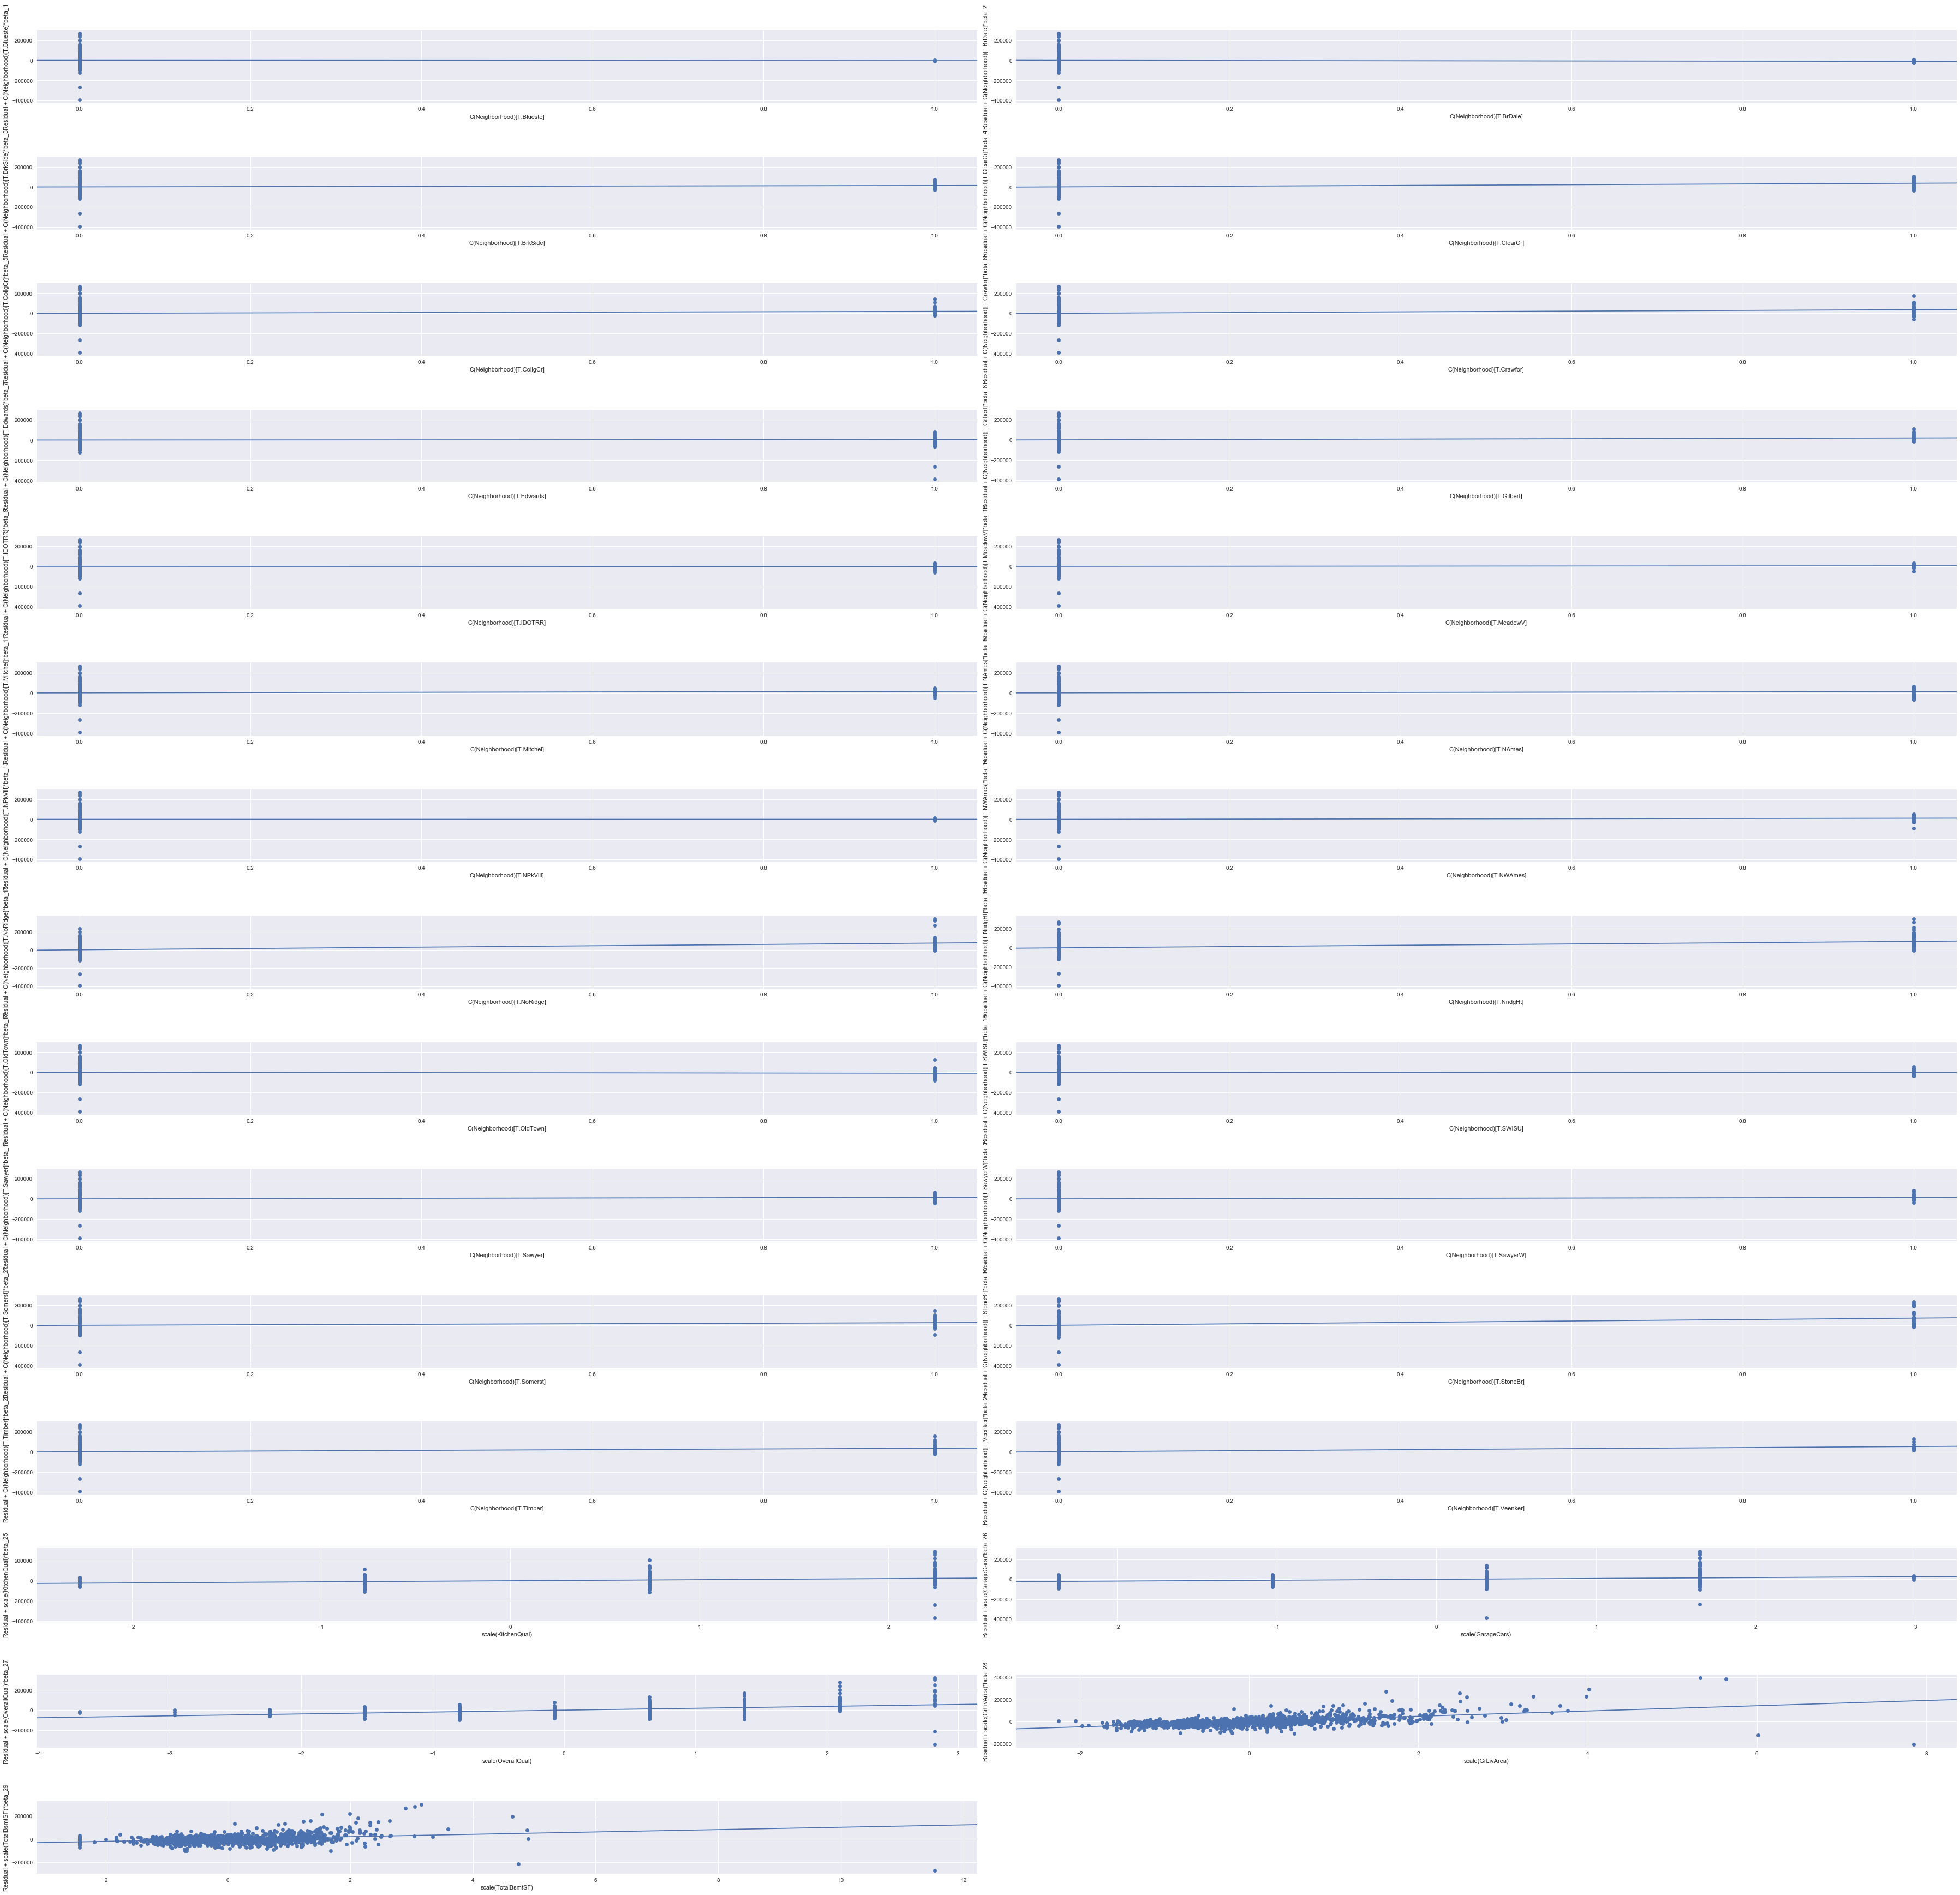

In [10]:
fig_ccpr = plt.figure(figsize=(50,50))
sm.graphics.plot_ccpr_grid(result_first, fig=fig_ccpr)
fig_ccpr.suptitle("")
plt.show()

## 실수값 변수의 다항회귀 (차수 결정)

$$ y =   K + GC + O + GA + TB + Category $$

In [11]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(10)
y, X = dmatrices("SalePrice ~  scale(KitchenQual) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8073050931840724


$$ y =   K + K^2 + GC + O + GA + TB + Category $$

In [28]:
model_first = sm.OLS.from_formula("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2)) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", data=df_raw)
result_first = model_first.fit()
y, X = dmatrices("SalePrice ~ scale(KitchenQual)+ scale(I(KitchenQual**2)) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8136679890346551


$$ y =   K + K^2 + K^3 + GC + O + GA + TB + Category $$

In [29]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.814860849703383


$$ y =   K + K^2 + K^3 + K^4 + GC + O + GA + TB + Category $$

In [31]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2)) + scale(I(KitchenQual**3)) + scale(I(KitchenQual**4)) + scale(GarageCars) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.814881029659128


$$ y =   K + K^2 + K^3 + GC + GC^2 + O + GA + TB + Category $$

In [33]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8177986338162417


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + GA + TB + Category $$

In [35]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + scale(I(GarageCars**3)) + C(Neighborhood)+ scale(OverallQual) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8174863338550796


$$ y =   K + K^2 + K^3 + GC + GC^2 + O + O^2 + GA + TB + Category $$

In [37]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + scale(I(GarageCars**3)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual**2)) + scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8235684972604254


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + GA + TB + Category $$

In [41]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8242167282338528


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + O^4 + GA  + TB + Category $$

In [44]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(I(OverallQual)**4)+ scale(GrLivArea) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8239901581673932


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + GA + GA^2 + TB + Category $$

In [45]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(TotalBsmtSF)", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8182042597136168


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + GA + TB + TB^2 + Category $$

In [46]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2))", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8243934247701633


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + GA + TB + TB^2 + TB^3+ Category $$

In [56]:
y, X = dmatrices("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2)) + scale(I(TotalBsmtSF**3))", df_raw, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.836658529988614


$$ y =   K + K^2 + K^3 + GC + GC^2 + GC^3 + O + O^2 + O^3 + GA + TB + TB^2 + TB^3+ TB^4+ Category $$

In [59]:
model_first = sm.OLS.from_formula("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(GarageCars) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2)) + scale(I(TotalBsmtSF**3))", data=df_raw)
result_first = model_first.fit()
print(result_first.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     243.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:45:02   Log-Likelihood:                -17096.
No. Observations:                1459   AIC:                         3.427e+04
Df Residuals:                    1422   BIC:                         3.446e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### leverage, outlier

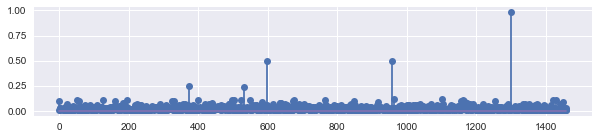

In [63]:
influence = result_first.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

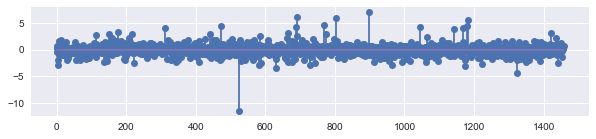

In [66]:
# 표준화 잔차 계산
plt.figure(figsize=(10, 2))
plt.stem(result_first.resid_pearson)
plt.show()

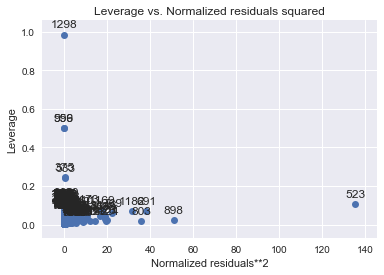

In [78]:
plt.figure(figsize=(50, 50))
sm.graphics.plot_leverage_resid2(result_first)
plt.show()

In [84]:
# 아웃라이어 제거
influence = result_first.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 13)
idx = np.where(cooks_d2 > fox_cr)[0]
df_fin1 = df_raw.copy()
df_fin1 = df_fin1.drop(df_fin1.index[idx])


model_firstfin = sm.OLS.from_formula("SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2)) + scale(I(TotalBsmtSF**3))", data=df_fin1)
result_firstfin = model_firstfin.fit()
print(result_firstfin.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     375.3
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        06:04:58   Log-Likelihood:                -15632.
No. Observations:                1379   AIC:                         3.134e+04
Df Residuals:                    1343   BIC:                         3.152e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

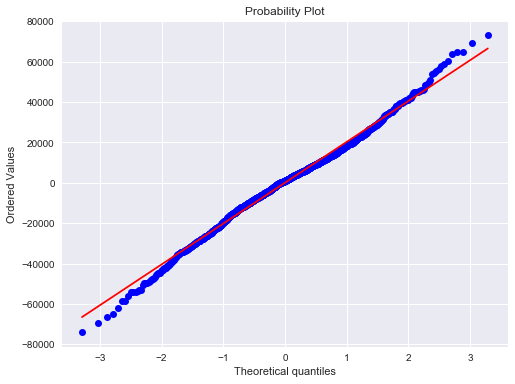

Chi^2       : 17.450
P-value     :  0.000


In [85]:
plt.figure(figsize=(8, 6))
sp.stats.probplot(result_firstfin.resid, plot=plt)
plt.show()
#잔차 정규성 P-value
test = sms.omni_normtest(result_firstfin.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [86]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

y, X = dmatrices( "SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2)) + scale(I(TotalBsmtSF**3))", df_fin1 , return_type = 'dataframe' )

#poly = PolynomialFeatures(1)
model1_LR = LinearRegression().fit(X, y)
model1_ridge = Ridge().fit(X, y)
model1_lasso = Lasso().fit(X, y)
model1_EN = ElasticNet().fit(X, y)
                
cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [0.88727299 0.85653136 0.90665274 0.90148302 0.89486565 0.93003951
 0.9175175  0.89992194 0.89574443 0.89848646] 
 mean :  0.8982209033361434 

[Ridge]
score :  [0.89273387 0.92217387 0.87158919 0.9038377  0.90870302 0.88705457
 0.8955611  0.88784107 0.9024071  0.90192833] 
 mean :  0.8947154441587104 


[Lasso]
score :  [0.93157795 0.91474164 0.90794875 0.88358534 0.88152529 0.87585146
 0.88432199 0.90790096 0.90894146 0.88766887] 
 mean :  0.8977537647413076 


[Elastic-net]
score :  [0.84648182 0.85496281 0.87409611 0.88024375 0.88205173 0.840057
 0.82927719 0.84172436 0.85227399 0.84756533] 
 mean :  0.8553952012520473 

